In [1]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

In [2]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key = 'checkin.json'
data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_json(data_location, lines=True)

In [3]:
df.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [11]:
def visits(text):
    return len(text.split(','))

In [12]:
df['no_visits'] = df['date'].apply(lambda x: visits(x))

In [15]:
import seaborn as sns

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


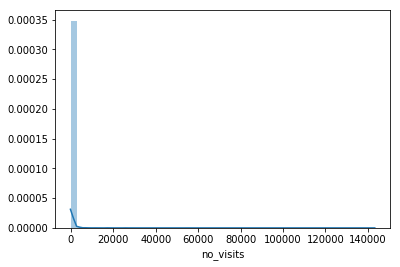

In [20]:
sns.distplot(df['no_visits'])

In [19]:
df['no_visits'].describe()

count    161950.000000
mean        117.870627
std         733.721561
min           1.000000
25%           5.000000
50%          16.000000
75%          65.000000
max      143061.000000
Name: no_visits, dtype: float64

In [4]:
df.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [6]:
df['business_id'].describe()

count                     161950
unique                    161950
top       70zgsd7ChWnaxAmdDWT0hQ
freq                           1
Name: business_id, dtype: object

In [14]:
df[df['business_id'] == '70zgsd7ChWnaxAmdDWT0hQ'].values[0]

array(['70zgsd7ChWnaxAmdDWT0hQ',
       '2011-12-10 21:50:43, 2011-12-29 22:21:01, 2011-12-31 18:19:39, 2012-01-10 22:58:21, 2012-01-28 19:39:28, 2012-02-04 17:00:46, 2012-02-26 20:58:47, 2012-07-15 16:36:47, 2013-02-23 17:14:18, 2013-04-16 16:07:18, 2013-04-24 21:12:40, 2013-11-21 20:42:39, 2014-02-01 17:19:28, 2014-02-07 17:43:43, 2014-04-30 21:23:05, 2014-06-05 15:18:04, 2014-11-08 00:57:59, 2015-03-21 17:01:44, 2015-03-26 16:50:45, 2015-05-09 21:17:59, 2015-07-27 13:41:05, 2015-08-20 17:11:24, 2015-09-02 13:26:35, 2015-09-21 13:10:33, 2015-10-15 16:45:57, 2015-10-18 19:35:56, 2015-11-17 00:07:04, 2015-11-20 15:20:11, 2015-12-01 14:13:48, 2015-12-16 14:08:34, 2016-01-02 14:41:41, 2016-01-04 14:01:36, 2016-01-09 14:27:05, 2016-01-14 14:01:38, 2016-01-26 17:35:47, 2016-02-03 13:55:32, 2016-02-08 20:56:15, 2016-02-11 16:54:28, 2016-02-22 13:44:23, 2016-02-29 13:56:55, 2016-03-12 17:43:37, 2016-03-17 16:35:07, 2016-03-18 17:38:17, 2016-04-04 13:02:02, 2016-05-02 13:20:15, 2016-05-12 13: